# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.039705e+01     6.742551e+00
 * time: 0.0016169548034667969
     1     2.910347e+01     4.825278e+00
 * time: 0.005326032638549805
     2     1.973039e+01     3.742285e+00
 * time: 0.009029865264892578
     3     1.425097e+01     2.573660e+00
 * time: 0.012891054153442383
     4     1.366234e+01     3.637607e+00
 * time: 0.015613079071044922
     5     1.147587e+01     1.859069e+00
 * time: 0.01925802230834961
     6     1.031813e+01     2.330317e+00
 * time: 0.022455930709838867
     7     9.330578e+00     1.334081e+00
 * time: 0.025714874267578125
     8     8.780136e+00     1.086053e+00
 * time: 0.07749104499816895
     9     8.584217e+00     6.441226e-01
 * time: 0.08052992820739746
    10     8.468477e+00     6.620595e-01
 * time: 0.08397889137268066
    11     8.321546e+00     5.673009e-01
 * time: 0.0873880386352539
    12     8.196992e+00     4.205684e-01
 * time: 0.0906209945678711
    13     8.086047e+00     3.048854e-01
 *

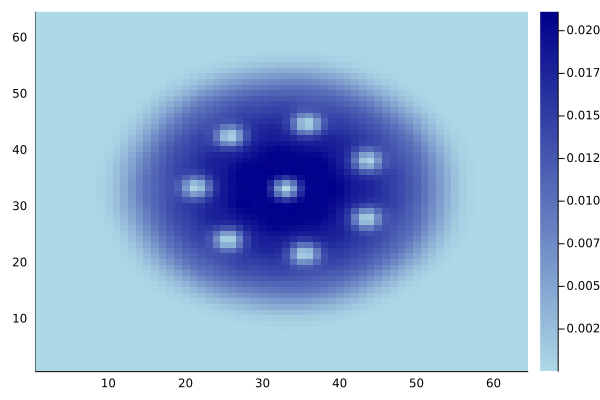

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)